# ChIP-seq

## Mapping Reads

Bash script: For each sample, generate map sample back to reference

In [ ]:
%%bash
cd g1e
for sample in *.fastq
do
        #echo ${sample%%.*}
        bowtie2 -x ../bowtie_index/chr19 -U ${sample%%.*}.fastq -S ${sample%%.*}.sam -p 6
        samtools view -bSo ${sample%%.*}.bam ${sample%%.*}.sam
        samtools sort ${sample%%.*}.bam -o ${sample%%.*}.sorted.bam
        samtools index ${sample%%.*}.sorted.bam
done

Bash script: For each sample, use macs2 to call ChIP-seq peaks

## Calling Peaks

In [ ]:
%%bash
for condition in G1E ER4
do
        mkdir $condition
        cd $condition
        macs2 callpeak -t ../CTCF_${condition}.bam -c ../input_${condition}.bam --format=BAM --name=CTCF_$condition --gsize 614
        cd ../
done

The important file generated here for the next step is {sample}.narrowPeak. This file looks like this: 

In [1]:
%%bash 
less -S ./g1e/ER4/ER4_peaks.narrowPeak | head

chr19	3208370	3208515	ER4_peak_1	84	.	7.65977	11.3454	8.43177	63
chr19	3292050	3292339	ER4_peak_2	131	.	9.166	16.2172	13.1558	155
chr19	3320885	3321144	ER4_peak_3	210	.	14.1138	24.3182	21.0141	161
chr19	3322397	3322611	ER4_peak_4	62	.	6.3805	9.08008	6.26144	95
chr19	3347898	3348096	ER4_peak_5	47	.	5.79244	7.51662	4.76083	106
chr19	3355241	3355415	ER4_peak_6	80	.	7.58092	10.9318	8.04178	68
chr19	3436948	3437178	ER4_peak_7	225	.	14.5612	25.9143	22.5713	111
chr19	3451255	3451586	ER4_peak_8	260	.	14.4592	29.5237	26.0837	166
chr19	3581469	3581603	ER4_peak_9	84	.	7.65977	11.3454	8.43177	78
chr19	3586580	3586862	ER4_peak_10	451	.	20.5167	49.2668	45.1303	165


## Differential Binding

To find peaks gained during differentiation, we want to identify the peaks found in ER4 cells and not present in G1E. To do so:

In [ ]:
%%bash
bedtools intersect -a ER4/CTCF_ER4_peaks.narrowPeak -b G1E/CTCF_G1E_peaks.narrowPeak -v > CTCF_gained_differentiation.bed

This generates a file that looks like this: 

In [3]:
%%bash 
less -S ./g1e/CTCF_gained_differentiation.bed | head 

chr19	3208370	3208515	CTCF_ER4_peak_1	84	.	7.65977	11.3454	8.43177	63
chr19	3355241	3355415	CTCF_ER4_peak_6	80	.	7.58092	10.9318	8.04178	68
chr19	3581469	3581603	CTCF_ER4_peak_9	84	.	7.65977	11.3454	8.43177	78
chr19	3619493	3619782	CTCF_ER4_peak_12	49	.	5.89783	7.71107	4.95136	116
chr19	3719176	3719306	CTCF_ER4_peak_15	39	.	5.12473	6.618	3.91409	87
chr19	4125737	4125868	CTCF_ER4_peak_25	67	.	7.17368	9.60462	6.76423	68
chr19	4136039	4136319	CTCF_ER4_peak_26	107	.	8.73525	13.7437	10.759	193
chr19	4169525	4169771	CTCF_ER4_peak_27	323	.	18.2933	36.0094	32.3432	122
chr19	4279606	4279758	CTCF_ER4_peak_33	52	.	6.06331	8.02723	5.25382	27
chr19	4384424	4384560	CTCF_ER4_peak_38	58	.	6.60848	8.68661	5.88803	84


Likewise, peaks lost during differentiation will be seen in G1E and not in ER4. They are found with: 

In [ ]:
%%bash
bedtools intersect -a G1E/CTCF_G1E_peaks.narrowPeak -b ER4/CTCF_ER4_peaks.narrowPeak -v > CTCF_lost_differentiation.bed

The resulting file looks like: 

In [5]:
%%bash
less -S ./g1e/CTCF_gained_differentiation.bed | head

chr19	3208370	3208515	CTCF_ER4_peak_1	84	.	7.65977	11.3454	8.43177	63
chr19	3355241	3355415	CTCF_ER4_peak_6	80	.	7.58092	10.9318	8.04178	68
chr19	3581469	3581603	CTCF_ER4_peak_9	84	.	7.65977	11.3454	8.43177	78
chr19	3619493	3619782	CTCF_ER4_peak_12	49	.	5.89783	7.71107	4.95136	116
chr19	3719176	3719306	CTCF_ER4_peak_15	39	.	5.12473	6.618	3.91409	87
chr19	4125737	4125868	CTCF_ER4_peak_25	67	.	7.17368	9.60462	6.76423	68
chr19	4136039	4136319	CTCF_ER4_peak_26	107	.	8.73525	13.7437	10.759	193
chr19	4169525	4169771	CTCF_ER4_peak_27	323	.	18.2933	36.0094	32.3432	122
chr19	4279606	4279758	CTCF_ER4_peak_33	52	.	6.06331	8.02723	5.25382	27
chr19	4384424	4384560	CTCF_ER4_peak_38	58	.	6.60848	8.68661	5.88803	84


## Feature Overlapping 

Feature overlaps can be found using the bedtools intersect command. Feature overalps with ER4:

In [ ]:
%%bash
bedtools intersect -wa -a Mus_musculus.GRCm38.94_features.bed -b g1e/ER4/CTCF_ER4_peaks.narrowPeak

Feature overlaps with GR1:

In [ ]:
%%bash
bedtools intersect -C -a Mus_musculus.GRCm38.94_features.bed -b ./g1e/G1E/CTCF_G1E_peaks.narrowPeak > intersect_GR1_peaks.bed 

This has produced two files, in the general format of : 

In [7]:
%%bash
sort -k7 -nr intersect_GR1_peaks.bed | head

chr19	53677592	53813248	intron	.	+	4
chr19	45363886	45502932	intron	.	+	4
chr19	6618263	6674271	intron	.	-	3
chr19	61058276	61127007	intron	.	-	3
chr19	47501717	47507806	intron	.	-	3
chr19	37550565	37570383	intron	.	+	3
chr19	33202648	33382367	intron	.	-	3
chr19	22139301	22697422	intron	.	+	3
chr19	7435138	7456300	intron	.	-	2
chr19	6979141	6980394	intron	.	-	2


with the final numeric column representing the number of intersecting CTCF sites in the region. To plot, we want to sum the final column by the feature type. To do so for for GR1 data: 

In [ ]:
%%bash
promoter_count=`awk '/promoter/ {s+=$7}END{print s}' intersect_GR1_peaks.bed`
intron_count=`awk '/intron/ {s+=$7}END{print s}' intersect_GR1_peaks.bed`
exon_count=`awk '/exon/ {s+=$7}END{print s}' intersect_GR1_peaks.bed`
printf "%s\t%i\n" exon $exon_count > GR1_to_plot.txt
printf "%s\t%i\n" intron $intron_count >> GR1_to_plot.txt
printf "%s\t%i\n" promoter $promoter_count >> GR1_to_plot.txt

Generates the following table:

In [9]:
%%bash
cat GR1_to_plot.txt

exon	85
intron	311
promoter	55


The same done for ER4:

In [ ]:
%%bash
promoter_count=`awk '/promoter/ {s+=$7}END{print s}' intersect_ER4_peaks.bed`
intron_count=`awk '/intron/ {s+=$7}END{print s}' intersect_ER4_peaks.bed`
exon_count=`awk '/exon/ {s+=$7}END{print s}' intersect_ER4_peaks.bed`
printf "%s\t%i\n" exon $exon_count > ER4_to_plot.txt
printf "%s\t%i\n" intron $intron_count >> ER4_to_plot.txt
printf "%s\t%i\n" promoter $promoter_count >> ER4_to_plot.txt

Generates the following table: 

In [10]:
%%bash 
cat ER4_to_plot.txt

exon	101
intron	341
promoter	67


## Plotting 

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
ER4_left_pannel = pd.read_csv("ER4_to_plot.txt", sep='\t', header = None)
GR1_left_pannel = pd.read_csv("GR1_to_plot.txt", sep='\t', header = None)

In [40]:
to_plot = pd.read_csv("to_plot.txt", sep='\t', header = None)

In [71]:
%%bash
wc -l g1e/CTCF_gained_differentiation.bed 
wc -l g1e/CTCF_lost_differentiation.bed 

     123 g1e/CTCF_gained_differentiation.bed
      59 g1e/CTCF_lost_differentiation.bed


/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


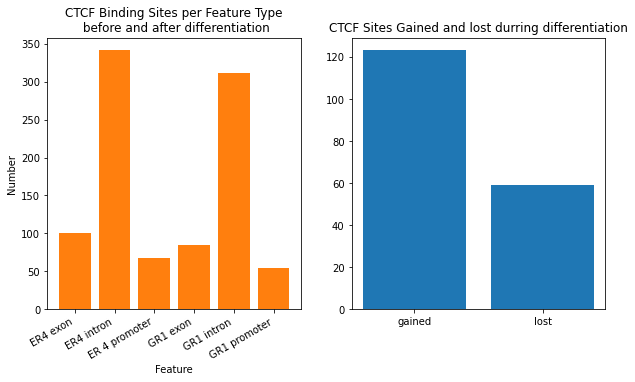

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.bar(to_plot.loc[:,0], to_plot.loc[:,1])
ax1.bar(to_plot.loc[:,0], to_plot.loc[:,1])
ax1.set_xlabel("Feature")
ax1.set_ylabel("Number")
ax1.set_title("CTCF Binding Sites per Feature Type\n before and after differentiation")
ax2.set_title("CTCF Sites Gained and lost durring differentiation")
ax1.set_xticklabels(to_plot.loc[:,0], rotation=30, ha='right')
ax2.bar(["gained", "lost"], [123, 59])
plt.show()

## Part II

First, to make the input file, I want to sort the ER4 narrowPeak file by -log10 p value and select the 100 most significant. This is done as such:

In [ ]:
%%bash 
sort -k8 -nr ER4_peaks.narrowPeak | head -n 100 > ER4_most_sig.bed

Giving a file that starts like so: 

In [20]:
%%bash
head g1e/ER4/ER4_most_sig.bed

chr19	44582576	44583088	ER4_peak_475	944	.	42.1345	102.256	94.4687	243
chr19	6262223	6262602	ER4_peak_103	914	.	39.6848	97.763	91.4324	186
chr19	41442600	41442958	ER4_peak_412	902	.	36.3803	96.3429	90.2546	182
chr19	44363400	44363834	ER4_peak_468	900	.	40.1436	96.0664	90.05	282
chr19	10502605	10502969	ER4_peak_177	875	.	37.567	93.2599	87.5061	192
chr19	59239486	59239830	ER4_peak_644	851	.	38.0395	90.699	85.1186	166
chr19	37265833	37266079	ER4_peak_367	783	.	33.6194	83.6707	78.3244	126
chr19	10059857	10060255	ER4_peak_162	778	.	33.6648	83.1776	77.8437	198
chr19	40345737	40346080	ER4_peak_389	761	.	35.3199	81.4157	76.1227	137
chr19	40391516	40391831	ER4_peak_390	759	.	33.9936	81.2794	75.9946	120


Now, I would like to convert this file to a FASTA file by mapping it back to the reference as such: 

In [ ]:
%%bash
bedtools getfasta -fi bowtie_index/chr19.fa -bed g1e/ER4/ER4_most_sig.bed > ER4_most_sig.fa

This generates a fasta file starting with: 

In [21]:
%%bash
head -n 2 ER4_most_sig.fa

>chr19:44582576-44583088
AAAGGTGCTGTTAACTGAAGCACTTTGCTGAGATGTGGAAGAGAGGATGTAATTCTGCATTCCCTTACTTCCAATGGGTGGACACGTCACCTTCCCAAAGTCAGGATGAGGAACAGAAGGGAGTCTAGGAGGCAGTGAGGTGGGAGGGGGTCTGTATATCCAGACCTCAAGCACCCTGTTTCCAGTGTGCTCCCTTGGGGCGAGTGGCCCCTGCTGTGGCCACAGCGTGGCGCACTTGCTCCATGCAGGGATCCAGAGCCACTTTGGGTGTTGGAATGGGCAGCACTGTGCTACCCACACTGCCCACTTGGGGGAGCCTGAGAGCCCGCTCTGCACAGGCCAGCTAGGCCTGAGATTTCCTGTGTGACAAAAAGACAAAAGTCTGGAGATGACTCCACAGCCTTACCCCTCCCTGTGGTACCTGCTGGGGCCAAGCTTCCCAATATGAGCTACATTTTCACATGGCCCACCATGCCAGGGGCCACTCTTCTCACAGGAGAGTGTAGAGATCA


This output file can be used as input for meme-chip:

In [ ]:
%%bash
meme-chip -meme-maxw 20 -oc meme_chip -db ../../motif_databases/JASPAR/JASPAR_CORE_2016.meme ../../ER4_most_sig.fa 

The meme-maxw parameter sets the max motif size to 20. The resulting sequence logo is included as seq_logo.png.